In [1]:
# from download import download
from bs4 import BeautifulSoup
import requests
import time
import re
import sqlite3

# DHTML

In [27]:
url = 'http://example.webscraping.com/places/ajax/search.json?'

param = {'search_term' : 'korea',
        'page_size' : '10',
        'page': '0'}
header = {'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'}

html = download('get', url, param=param, header=header)

dom = BeautifulSoup(html.text, 'lxml')

In [41]:
for _ in html.json()['records']:
    print(_['country'])

North Korea
South Korea


In [30]:
dom.text

'{"records": [{"pretty_link": " North Korea", "country": "North Korea", "id": 4552797}, {"pretty_link": " South Korea", "country": "South Korea", "id": 4552843}], "num_pages": 1, "error": ""}\n'

# Selenuim
- what
  - 테스팅 목적으로 만들어진 웹 어플리케이션 자동화
- why
  - 빠른 피드백
  - 테스팅 결점 확인
  - 애자일 또는 extream development methodologies를 지원

In [43]:
# ! pip install selenium

In [2]:
from selenium import webdriver

In [4]:
driver = webdriver.Chrome()

In [52]:
# %%writefile naver.json
# {
#     "id" : "",
#     "pw" : ""
# }

Overwriting naver.json


In [48]:
import json

In [53]:
with open('./naver.json') as fp:
    account = json.load(fp)

In [54]:
account['id']

'skarndcks'

In [60]:
driver.get("http://example.webscraping.com/places/default/search")

In [63]:
driver.page_source[:1000] ## html을 바로바로 받아볼 수 있다

'<html class=" js flexbox flexboxlegacy canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" lang="en-us" style=""><!--<![endif]--><head>\n<title>Example web scraping website</title>\n  <!--[if !HTML5]>\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n  <![endif]-->\n  <!-- www.phpied.com/conditional-comments-block-downloads/ -->\n  <!-- Always force latest IE rendering engine\n       (even in intranet) & Chrome Frame\n       Remove this if you use the .htaccess -->\n\t   \n  <meta charset="utf-8">\n\n  <!-- http://dev.w3.org/html5/markup/meta.name.html -->\n  <meta name="applicati

In [64]:
inputTag = driver.find_element_by_id('search_term')
inputTag

<selenium.webdriver.remote.webelement.WebElement (session="d265066da30d5e2ba2af0f81dab79bbd", element="60e571e9-bf45-4340-9abe-8bb26945c968")>

In [65]:
inputTag.send_keys('korea')

In [69]:
submitTag = driver.find_element_by_xpath("//input[@type='submit']")
submitTag

<selenium.webdriver.remote.webelement.WebElement (session="d265066da30d5e2ba2af0f81dab79bbd", element="f0aef7d5-b0e2-41ac-87d2-6e802c0d91aa")>

In [71]:
submitTag.click()

In [72]:
dom = BeautifulSoup(driver.page_source, 'lxml')

In [73]:
dom.select('#results')

[<div id="results"><table><tbody><tr><td><div><a href="/places/default/view/North-Korea-165"><img src="/places/static/images/flags/kp.png"/> North Korea</a></div></td><td><div><a href="/places/default/view/South-Korea-211"><img src="/places/static/images/flags/kr.png"/> South Korea</a></div></td></tr></tbody></table></div>]

In [76]:
# selenium에서 바로 가져오기
driver.find_element_by_css_selector('#results').text

'North Korea\nSouth Korea'

네이버에 로그인하기
--------------
- 브라우저에 렌더링하는 시간이 걸린다.
    - 렌더링 시간 때문에 에러가 나기도 함

In [99]:
driver.get('https://www.naver.com')

In [100]:
driver.find_element_by_class_name('lg_local_btn').click()

In [101]:
driver.find_element_by_id('id').send_keys(account['id']) # id 입력

In [106]:
driver.find_element_by_css_selector(".pw_area input[type='password']").send_keys(account['pw']) # pw 입력

In [103]:
driver.find_element_by_css_selector(".btn_global").click() ## captcha ㅋㅋ 

In [134]:
[_.text for _ in driver.find_elements_by_css_selector('.mTitle > .subject > a > span > strong')]

['[[부스트코스] 안드로이드 프로그래밍] 누워 있다가 방학 끝나요! 코딩 공부하고 활동증도 챙겨 가세요',
 '[VIBE] 구매내역 안내',
 '네이버 클라우드 휴면 알림메일입니다.',
 '[[부스트코스] 안드로이드 프로그래밍] 부스트캠프 2019에서 웹개발자로 성장할 분을 모집합니다.',
 '[VIBE] 구매내역 안내',
 '[KOOC] 시스템 모델링 시뮬레이션 개론 신규 강좌 오픈',
 '[인공지능 및 기계학습 개론Ⅰ] KOOC 인공지능 및 기계학습 개론 1 수강생 여러분께.',
 '[VIBE] 구매내역 안내',
 '[인공지능 및 기계학습 개론Ⅰ] KOOC 인공지능 및 기계학습 개론 1 학습자 여러분께.',
 '2장 프린트 해줘 찬아.',
 '[인공지능 및 기계학습 개론Ⅰ] [KOOC] 인공지능 및 기계학습 개론 1 강좌 수강생분들께.',
 '[인공지능 및 기계학습 개론Ⅰ] [KOOC] 인공지능 및 기계학습 개론 1 강좌 수강생분들께.',
 '[KOOC] 2019년 KAIST 신규 온라인 강좌 확인하러 Go! Go!',
 '블리자드 계정 인증',
 '블리자드 계정 보안 관련 안내']

In [140]:
driver.find_element_by_id('5_fol').click()
[_.text for _ in driver.find_elements_by_css_selector('.mTitle > .subject > a > span > strong')]

['(광고) the100 매거진과 즐거운 하루 되세요',
 '가입 첫입금l5％ 매일_첫입금l0％ 가입쿠폰 2만 지급',
 '(광고) [50%특가] 크리스챤아이패드10.1 인치 큰화면 폭발적인기; 성경주석30질/전자성경(정독/속독/관주)+반주기+오디오찬송가+NIV영어성경오디오+복음성가+성경성구사전+히브리어헬라어성경+영어주석+영어설교+중국어오디오성경+영어일어중국어학습기+통번역기+강해집/예화집/유머/기도문등 200만편+설교노트+무료케이블TV(100개',
 '(성인)가입-첫입/금15% 매일 첫입/금10% 재입/금10%',
 '(광고) [50%특가] 크리스챤아이패드10.1 인치 큰화면 폭발적인기; 성경주석30질/전자성경(정독/속독/관주)+반주기+오디오찬송가+NIV영어성경오디오+복음성가+성경성구사전+히브리어헬라어성경+영어주석+영어설교+중국어오디오성경+영어일어중국어학습기+통번역기+강해집/예화집/유머/기도문등 200만편+설교노트+무료케이블TV(100개',
 '(광고) the100 매거진과 즐거운 하루 되세요',
 '(광고) [50%특가] 크리스챤아이패드10.1 인치 큰화면 폭발적인기; 성경주석30질/전자성경(정독/속독/관주)+반주기+오디오찬송가+NIV영어성경오디오+복음성가+성경성구사전+히브리어헬라어성경+영어주석+영어설교+중국어오디오성경+영어일어중국어학습기+통번역기+강해집/예화집/유머/기도문등 200만편+설교노트+무료케이블TV(100개',
 '(광고) 크리스챤아이패드10.1 인치 폭발적인기 50% 특가; 성경주석30질/전자성경(정독/속독/관주)+반주기+오디오찬송가+NIV영어성경오디오+복음성가+성경성구사전+히브리어헬라어성경+영어주석+영어설교+중국어오디오성경+영어일어중국어학습기+통번역기+강해집/예화집/유머/기도문등 200만편+설교노트+무료케이블TV(100개',
 '[광고] 크리스챤 싱글 예배&미팅과 만남/기독결혼세미나/선교훈련 온오프라인 수시모집 안내']

## Cookie, Session
- 로그인이 되어있다. 쿠키값이 있을 것이다.
- 셀레늄은 쿠키값을 가져오기 위해 사용하는 것이다.

In [142]:
for cookie in driver.get_cookies():
    print(cookie['name'], cookie['value'])
    session.cookies.set(cookie['name'], cookie['value'])

NIPD 1
NNB GJLUQFJ5QMXF2
NID_JKL 5LaJPkjl8i3ZQvVuF9TGS3AzrxIKVX5IgQFkBG2XhjQ=
nid_inf 1376545728
NMUSER uXKlKqEwaqbsFAtrFq2rbrRCb4lvMrRqaqu9FoKqKqgXaxMsFxuZKAnmaqns3xnDKxEs6xRaaZnla9vs6xRpa9vsadUsaqROW9e7EoRpadUsawlGW430DVd974lR74lC+4kZ74FTWLm/axgmar05pzk/7xERbrkoWrlvMBil74lR74lC+4kZ74FTWLm/axgmam==
NID_SES AAABq3Y3ACetmWp5/iicM6VK3Fs0u0dUl/2p5kzzsQFDsDwu4VhyR5985V8/K0ZHRaUsWiUeAfP1+vyhGurTtSn/TG8VVcg6ZjePXIxgKhiVW6IQI7eYkRjf4U7urXwE9/4mzIbMARv69/iwQyqQlojhHqN4ZOzmsn3+C6nXfqKTOCDRrV3o3KL7V89FhtP64vtaEs2Gcq+GllHvVPjySsJVBXc1CNrLwBUzCJONpVrpjoScwL2JW/luyFWHLE97B0oexaTJmqcmmtF/34Ln1qM/Zti7TrOuEHnN1ylCR0LgIsGJGv7NflA0AhoX52Jty9cBnvzh9xXX9cqK4vYPmpXVZAwU9kggediAWAc78qYSz+/CAMXYBIddXbo03TLNwul8t/4mZkj6CR583ihzSOAFv+Va6QPpOdKZzTNLqolbWY4VEFD5iirPpi0bmZGnXSlBF+x+X0iC6Q1oYaDJeM7fBmrrW8JND2vsNd+/vatLh05A31htvu8WI3cR5/QsLw1snSBQKlP6uraKKa/LpMV1PcVfBsf4BciTbwG8ua2NiMaQjrqVnq3TCpgIo3UORQKq2Q==
NID_AUT u/wAU20UXtsjYFTUd2dyTpr9CMPhV6FknhM3nywm4OEvtAPTV1HZUzvwCx4umkpb


In [143]:
## session 생성
session = requests.Session()

In [147]:
for cookie in driver.get_cookies():
    session.cookies.set(cookie['name'], cookie['value']) # cookie 설정

In [148]:
session.cookies

<RequestsCookieJar[Cookie(version=0, name='NID_AUT', value='u/wAU20UXtsjYFTUd2dyTpr9CMPhV6FknhM3nywm4OEvtAPTV1HZUzvwCx4umkpb', port=None, port_specified=False, domain='', domain_specified=False, domain_initial_dot=False, path='/', path_specified=True, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False), Cookie(version=0, name='NID_JKL', value='5LaJPkjl8i3ZQvVuF9TGS3AzrxIKVX5IgQFkBG2XhjQ=', port=None, port_specified=False, domain='', domain_specified=False, domain_initial_dot=False, path='/', path_specified=True, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False), Cookie(version=0, name='NID_SES', value='AAABq3Y3ACetmWp5/iicM6VK3Fs0u0dUl/2p5kzzsQFDsDwu4VhyR5985V8/K0ZHRaUsWiUeAfP1+vyhGurTtSn/TG8VVcg6ZjePXIxgKhiVW6IQI7eYkRjf4U7urXwE9/4mzIbMARv69/iwQyqQlojhHqN4ZOzmsn3+C6nXfqKTOCDRrV3o3KL7V89FhtP64vtaEs2Gcq+GllHvVPjySsJVBXc1CNrLwBUzCJONpVrpjoScwL2JW/luyFWHLE97B0oexaTJ

In [159]:
html = session.get('https://mail.naver.com/')
html.text # 메일 내용은 없다. ㅠㅠㅠ나오는데...???

'\n\n\n<!DOCTYPE HTML>\n\n\t\n\t\n\t\n\t\n\t\n\t\t<html lang="ko">\n\t\n\n\n<head>\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n\t\n\t\t\n\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail2_le.min.190611.css">\n\t\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail_skin.min.190611.css">\n\t\t\t\t\n\t\t\t\t\n\t\t\t\n\t\t\n\t\n\n\t\n\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\t<link rel="dns-prefetch" href="//ssl.pstatic.net" />\n\t\t\t\t\t<link rel="dns-prefetch" href="//lcs.naver.com" />\n\t\t\t\t\t<link rel="dns-prefetch" href="//cc.naver.com" />\n\t\t\t\t\t<link rel="dns-prefetch" href="//static.nid.naver.com" />\n\t\t\t\t\t<link rel="dns-prefetch" href="//phinf.pstatic.net" />\n\t\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail_me.min.190611.css">\n\t\t\t\t\n\t\t\t\n\t\t\t<link rel="shortcut icon" href="/favicon.ico?2">\n\t\t\t\n\t\t\n\n\t\

In [158]:
html = session.post('https://mail.naver.com/json/list/?page=1&sortField=1&sortType=0&folderSN=0&type=&isUnread=false&u=skarndcks')
for _ in html.json()['mailData']:
    print(_['subject'])

[[부스트코스] 안드로이드 프로그래밍] 누워 있다가 방학 끝나요! 코딩 공부하고 활동증도 챙겨 가세요
[VIBE] 구매내역 안내
네이버 클라우드 휴면 알림메일입니다.
[[부스트코스] 안드로이드 프로그래밍] 부스트캠프 2019에서 웹개발자로 성장할 분을 모집합니다.
[VIBE] 구매내역 안내
[KOOC] 시스템 모델링 시뮬레이션 개론 신규 강좌 오픈
[인공지능 및 기계학습 개론Ⅰ] KOOC 인공지능 및 기계학습 개론 1 수강생 여러분께.
[VIBE] 구매내역 안내
[인공지능 및 기계학습 개론Ⅰ] KOOC 인공지능 및 기계학습 개론 1 학습자 여러분께.
2장 프린트 해줘 찬아.
[인공지능 및 기계학습 개론Ⅰ] [KOOC] 인공지능 및 기계학습 개론 1 강좌 수강생분들께.
[인공지능 및 기계학습 개론Ⅰ] [KOOC] 인공지능 및 기계학습 개론 1 강좌 수강생분들께.
[KOOC] 2019년 KAIST 신규 온라인 강좌 확인하러 Go! Go!
블리자드 계정 인증
블리자드 계정 보안 관련 안내


In [160]:
html = requests.post('https://mail.naver.com/json/list/?page=1&sortField=1&sortType=0&folderSN=0&type=&isUnread=false&u=skarndcks')
html.text ## cookie 값이 없기 때문에 fail

'{"Result":"FAIL","Message":"", "LoginStatus":"NOLOGIN"}'

In [162]:
html = session.post('https://mail.naver.com/json/list/?page=1&sortField=1&sortType=0&folderSN=5&type=&isUnread=false&u=skarndcks')
# t
for _ in html.json()['mailData']:
    print(_['subject'])

(광고) the100 매거진과 즐거운 하루 되세요
가입 첫입금l5％ 매일_첫입금l0％ 가입쿠폰 2만 지급
(광고) [50%특가] 크리스챤아이패드10.1 인치 큰화면  폭발적인기; 성경주석30질/전자성경(정독/속독/관주)+반주기+오디오찬송가+NIV영어성경오디오+복음성가+성경성구사전+히브리어헬라어성경+영어주석+영어설교+중국어오디오성경+영어일어중국어학습기+통번역기+강해집/예화집/유머/기도문등 200만편+설교노트+무료케이블TV(100개
(성인)가입-첫입/금15% 매일 첫입/금10% 재입/금10%
(광고) [50%특가] 크리스챤아이패드10.1 인치 큰화면  폭발적인기; 성경주석30질/전자성경(정독/속독/관주)+반주기+오디오찬송가+NIV영어성경오디오+복음성가+성경성구사전+히브리어헬라어성경+영어주석+영어설교+중국어오디오성경+영어일어중국어학습기+통번역기+강해집/예화집/유머/기도문등 200만편+설교노트+무료케이블TV(100개
(광고) the100 매거진과 즐거운 하루 되세요
(광고) [50%특가] 크리스챤아이패드10.1 인치 큰화면  폭발적인기; 성경주석30질/전자성경(정독/속독/관주)+반주기+오디오찬송가+NIV영어성경오디오+복음성가+성경성구사전+히브리어헬라어성경+영어주석+영어설교+중국어오디오성경+영어일어중국어학습기+통번역기+강해집/예화집/유머/기도문등 200만편+설교노트+무료케이블TV(100개
(광고) 크리스챤아이패드10.1 인치  폭발적인기 50% 특가; 성경주석30질/전자성경(정독/속독/관주)+반주기+오디오찬송가+NIV영어성경오디오+복음성가+성경성구사전+히브리어헬라어성경+영어주석+영어설교+중국어오디오성경+영어일어중국어학습기+통번역기+강해집/예화집/유머/기도문등 200만편+설교노트+무료케이블TV(100개
[광고] 크리스챤 싱글 예배&amp;미팅과 만남/기독결혼세미나/선교훈련 온오프라인 수시모집 안내


In [167]:
[_.text for _ in driver.find_elements_by_css_selector('.user_mycafe_list .name_area')]

['국내 최초 빅데이터 연합 동아리 BOAZ',
 '[유랑]유럽여행의든든한동반자\n대표카페',
 '스펙업 | 대학생,대외활동,공모전,알바,인턴,취업,NCS,공기업\n대표카페']

In [170]:
for cookie in driver.get_cookies():
    session.cookies.set(cookie['name'], cookie['value']) # cookie 설정

In [178]:
html = session.get('https://section.cafe.naver.com/cafe-home-api/v1/homepc?myCafeCount=10&articleCount=3&useMyCafeEvent=true')

html.json()['message']['result']

{'myCafe': {'cafes': [{'cafeId': 26506451,
    'cafeName': '국내 최초 빅데이터 연합 동아리 BOAZ',
    'cafeUrl': 'boazbigdata',
    'articleNewCounts': 17,
    'formattedArticleNewCounts': '17',
    'cafeThumbnailPcUrl': 'https://cafeptthumb-phinf.pstatic.net/20140314_255/0_1394780627655_PnVxSU_png/BOAZ_Logo_W1.png?type=f72_72_mask',
    'cafeThumbnailMobileUrl': 'https://mcafethumb-phinf.pstatic.net/20140314_255/0_1394780627655_PnVxSU_png/BOAZ_Logo_W1.png?type=f138_138_mask',
    'manageCafe': False,
    'dormantCafe': False,
    'powerCafe': False,
    'starJoinCafe': False,
    'gameCafe': False,
    'educationCafe': False,
    'mobileCafeName': '국내 최초 빅데이터 연합 동아리 BOAZ',
    'aheadOfTime': '2시간 전',
    'lastUpdateDate': '2019-07-17 10:54:13',
    'lastVisitDate': '2019-07-17 10:49:56',
    'openType': 'H',
    'favoriteCafe': False,
    'hasNewArticle': True,
    'articles': [{'cafeId': 26506451,
      'articleId': 4450,
      'subject': '분석 멘토링 D조 1주차 사진입니다 :)',
      'aheadOfTime': '2시간 전',
  

In [179]:
for _ in html.json()['message']['result']['myCafe']['cafes']:
    print(_['cafeName'] )

국내 최초 빅데이터 연합 동아리 BOAZ
[유랑]유럽여행의든든한동반자
스펙업 | 대학생,대외활동,공모전,알바,인턴,취업,NCS,공기업


In [182]:
for _ in driver.find_elements_by_xpath('''
    //div[@class='user_mycafe_list']
    //div[@class='user_mycafe_info']
    /a
    /strong[@class='name']
'''):
    print(_.text)

국내 최초 빅데이터 연합 동아리 BOAZ
[유랑]유럽여행의든든한동반자
스펙업 | 대학생,대외활동,공모전,알바,인턴,취업,NCS,공기업


In [187]:
dom = BeautifulSoup(driver.page_source, 'lxml')
dom.select("#gnb_name2 + a.gnb_btn_login")

[<a class="gnb_btn_login" href="https://nid.naver.com/nidlogin.logout?returl=https://section.cafe.naver.com/Logout.nhn?alreadyNaverLogout=true" id="gnb_logout_button"><span class="gnb_bg"></span><span class="gnb_bdr"></span><span class="gnb_txt">로그아웃</span></a>]

In [186]:
driver.find_element_by_css_selector("#gnb_name2 + a.gnb_btn_login").click() ## 못 가져온다

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=75.0.3770.142)


뉴스 긁어오기
-------------

In [267]:
[_.text for _ in driver.find_elements_by_css_selector("#main_content > .main_component.droppable li div[class='hdline_article_tit'] a, #main_content > .main_component.droppable li > a")]

["평화, '분당열차' 출발…反당권파, 제3지대 신창창당 본격 모색",
 '\'플랫폼 택시\' 허용했지만…"진입장벽 높아졌다" 볼멘소리도',
 '\'인종차별\' 트럼프 "그들 우리나라 싫어해"…바이든 "집에 가라"(종합)',
 '故정두언 빈소 조문 시작부터 추모객 이어져…MB “참으로 안타까워”',
 '‘아내 골프채 살해’ 유승현 前 김포시의회 의장, 불륜 알고 몰래 녹음도…살인 고의성 부인',
 '',
 '문의장, 5당 대표에 "문 대통령 회동, 허심탄회하게 다 이야기하시라"',
 '합참 "서해대교 잠망경 신고 \'부표\' 추정…대공혐의점 없어"(종합)',
 '\'제3지대 신당\' 띄운 민주평화당 비당권파 "정동영은 걸림돌"',
 '조국 이어 고민정까지 조선·중앙 이례적 실명 비판, 왜?',
 '전문의 “故 정두언 전 의원, 높은 자의식에 당일까지도 방송했을 것”',
 '[일문일답] "렌터카 불허했지만 \'타다\' 바로 불법되는 건 아냐"',
 '로또 청약 열기 다시 달아오르는 북위례',
 '삼성·SK하이닉스 "핵심소재 국산화 테스트 중…적용은 힘들어"',
 '"개인정보 주면 10달러 깎아줍니다" 아마존 판촉 논란',
 '[단독] 한 잔에 10만원?···세계에서 가장 비싼 커피 나온다',
 '‘세젤예’ 등 드라마 스태프, ‘프리랜서’ 취급…열악한 환경',
 '아리송한 직장내 괴롭힘 "이것만 알면 처벌 받을 일 없다"',
 "'탈세의혹' 아레나 실소유주, '바지사장' 내세운 업소 3곳 추가 적발",
 '이재명, \'국무회의 배석\' 가시화…"靑 조만간 긍정회신"',
 '한일 경색 국면속 한국영화 출연한 일본 배우들 `눈길`',
 '한반도 영향 첫 태풍 \'다나스\' 소형이지만…"수도권 위협"',
 '\'네일동\' 운영자 "참담하다"..최대 일본여행카페, 불매 지지·장기 휴면',
 '공주 송산리고분군에서 고분 41기 존재 가능성',
 '[단독]쿠팡, 다음달 배송차량에 전기트럭 업계 첫 투입',
 '어린 아이, 자외선 차단제 발라도 될까?',
 "한일 감정 악화하

In [294]:
titles = [_ for _ in driver.find_elements_by_css_selector("#main_content > .main_component.droppable li div[class='hdline_article_tit'] a, #main_content > .main_component.droppable li > a")]

In [295]:
del titles[5] # 빈 기사 삭제

In [3]:
conn = sqlite3.Connection('news.db')
cur = conn.cursor()

In [18]:
cur.executescript("""
    DROP TABLE IF EXISTS table1;
    CREATE TABLE table1(
        id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        title TEXT NOT NULL,
        url TEXT NOT NULL
    );
    
    DROP TABLE IF EXISTS table2;
    CREATE TABLE table2(
        id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        content TEXT NOT NULL,
        table1_id INTEGER NOT NULL
    );
""")
conn.commit()

In [377]:
from selenium.common.exceptions import ElementNotInteractableException

In [378]:
content = list()
cnt = 0
for _ in range(36):
    try:
        tmp = [_ for _ in driver.find_elements_by_css_selector("#main_content > .main_component.droppable li div[class='hdline_article_tit'] a, #main_content > .main_component.droppable li > a")][cnt]
        tmp.click()
        cnt += 1
        content.extend([_.text for _ in BeautifulSoup(driver.page_source, 'lxml').select('#articleBodyContents')])
        
        
        
        driver.back()
    except Exception as e:
        print(e)
        cnt+= 1
        continue

Message: element not interactable
  (Session info: chrome=75.0.3770.142)



KeyboardInterrupt: 

<selenium.webdriver.remote.webelement.WebElement (session="d265066da30d5e2ba2af0f81dab79bbd", element="5bdb46d2-6e8a-4251-90af-e2d4ea1275a0")>

In [357]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import ElementNotVisibleException
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException

In [363]:
wait= WebDriverWait(driver, 10, 0.5, [ElementNotVisibleException])
wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "#gnb_name2 + a.gnb_btn_login"))) # 숨겨진 애를 보이게 한다. 렌더링
driver.find_element_by_css_selector('#gnb_name2 + a.gnb_btn_login').click()

TimeoutException: Message: 


In [364]:
driver.find_element_by_css_selector('#gnb_name2 + a.gnb_btn_login')

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"#gnb_name2 + a.gnb_btn_login"}
  (Session info: chrome=75.0.3770.142)


In [374]:
wait= WebDriverWait(driver, 5, 0.5, [ElementNotVisibleException])
wait.until(lambda x : x.find_element_by_css_selector("#gnb_name2 + a.gnb_btn_login").is_displayed()) ## display 되었니? 안되면 timeout
driver.find_element_by_css_selector('#gnb_name2 + a.gnb_btn_login').click() # display 되었으니 click

In [370]:
logout = driver.find_element_by_css_selector('#gnb_name2 + a.gnb_btn_login')

In [373]:
logout.is_displayed()

True

Iframe
----------------------

In [402]:
iframe = driver.find_element_by_name('adCgiMain') # dom안에 dom이 있기 때문에 못가져옴

In [403]:
iframe.get_attribute('srcdoc')

'<style type="text/css">body {background-color:#fff;font-family:"돋움",dotum,sans-serif;font-size:11px; text-align:center; color:#cecece; letter-spacing:-1px;-webkit-touch-callout: none;margin:0;padding:0}</style>\n<!doctype html>\n<html lang="ko">\n<head>\n    <meta charset="UTF-8">\n    <meta http-equiv="X-UA-Compatible" content="ie=edge"/>\n    <meta http-equiv="imagetoolbar" content="no"/>\n    <meta http-equiv="imagetoolbar" content="false"/>\n    <meta name="viewport" content="width=device-width, user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0"/>\n    <meta name="robots" content="noarchive"/>\n    <meta name="robots" content="nosnippet"/>\n    <meta name="robots" content="noindex"/>\n    <meta name="robots" content="nofollow"/>\n    <meta name="robots" content="noodp"/>\n    <meta name="google" content="notranslate"/> \n    <meta name="ad.size" content="width=655,height=120"/>\n\n    <title>Kakao Advertisement</title>\n\n    <style type="text/css">*{margin

In [427]:
driver.switch_to.frame(iframe)

In [428]:
driver.find_element_by_tag_name('img').get_attribute('src')

'https://t1.daumcdn.net/b2/creative/90908/9afdb626eae1ef469a1778fc6477655d.jpg'

In [429]:
from IPython.display import Image

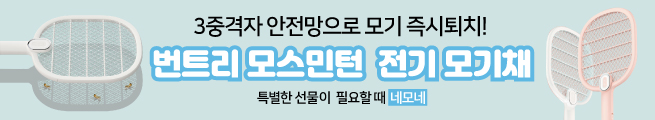

In [430]:
Image(driver.find_elements_by_tag_name('img')[0].get_attribute('src'))

In [426]:
driver.switch_to.default_content()

In [431]:
driver.window_handles


['CDwindow-69FB75A20B5391DCB561E019577F46DD']

In [443]:
driver.get('http://www.kt.com')

In [444]:
driver.find_element_by_css_selector('span.quick > a').click()

In [458]:
driver.switch_to.window(driver.window_handles[-1])

In [450]:
driver.find_element_by_id('userId').send_keys('asd')

In [2]:
from selenium.webdriver.common.keys import Keys

In [39]:
driver = webdriver.Chrome()

In [40]:

driver.get('https://www.google.com')

In [9]:
driver = webdriver.Chrome()

In [10]:
driver.get("https://news.naver.com")

In [25]:
for _ in [_ for _ in driver.find_elements_by_css_selector(
        ".hdline_news .hdline_article_tit > a, .com_list li > a") 
            if len(_.get_attribute("href")) > 1]:

    news=(_.text, _.get_attribute("href"))
    
    cur.execute("INSERT INTO table1(title, url) VALUES(?, ?)",
                [news[0], news[1]])
    conn.commit()
    
    cur.execute("SELECT id FROM table1 WHERE url=?",
                [news[1]])
    newsID = cur.fetchone()[0]
    
    driver.execute_script("javascript:console.log('%s');" %news[0].replace('\'', '\"'))
    driver.execute_script("javascript:window.open('about:blank');")
    driver.switch_to.window(driver.window_handles[-1])
    driver.get(news[1])
    
    cur.execute("INSERT INTO table2(table1_id, content) VALUES(?,?)",
                [newsID, driver.find_element_by_css_selector("#articleBodyContents").text])
    conn.commit()
    
    driver.close()
    driver.switch_to.window(driver.window_handles[0])